<font size="4">

## Dataset: Saratoga Houses

El dataset **SaratogaHouses** contiene información sobre viviendas en el condado de Saratoga, Nueva York. Cada fila representa una casa y las columnas describen diversas características relacionadas con la propiedad, como el tamaño de la vivienda (`livingArea`), el número de dormitorios y baños, la presencia de garaje o chimenea, el año de construcción, el tamaño del terreno (`landValue`), entre otros. La variable objetivo suele ser el **precio de venta** de la casa (`price`), lo que lo convierte en un dataset ideal para problemas de regresión en ciencia de datos e inteligencia artificial. Aunque algunas variables son numéricas, otras se comportan como categóricas, lo que permite explorar técnicas de tratamiento mixto y evaluación de modelos predictivos.

El dataset consta de 15 variables, a las cuales les acompaña la columna precio, que es la variable objetivo. A continuación, veremos que significa cada una de las variables de la matriz de características del dataset:

- price: precio de la vivienda.
- lotSize: metros cuadrados de la vivienda.
- age: antigüedad de la vivienda.
- landValue: valor del terreno.
- livingArea: metros cuadrados habitables.
- pctCollege: porcentaje del vecindario con título universitario.
- bedrooms: número de dormitorios.
- firplaces: número de chimeneas.
- bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
- rooms: número de habitaciones.
- heating: tipo de calefacción.
- fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).
- sewer: tipo de desagüe.
- waterfront: si la vivienda tiene vistas al lago.
- newConstruction: si la vivienda es de nueva construcción.
- centralAir: si la vivienda tiene aire acondicionado.


In [148]:
from math import remainder

# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')

In [149]:
# lectura del dataset
dataset = pd.read_csv("SaratogaHouses.csv", delimiter=",")

dataset.head(10)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
5,120000,0.68,31,14000,1152,22,4,1,1.0,8,hot air,gas,septic,No,No,No
6,153000,0.40,33,23300,2752,51,4,1,1.5,8,hot water/steam,oil,septic,No,No,No
7,170000,1.21,23,14600,1662,35,4,1,1.5,9,hot air,oil,septic,No,No,No
8,90000,0.83,36,22200,1632,51,3,0,1.5,8,electric,electric,septic,No,No,No
9,122900,1.94,4,21200,1416,44,3,0,1.5,6,hot air,gas,none,No,No,No


<font size="4">

# Análisis Exploratorio de los Datos (EDA)

Como podemos ver en el código debajo de este bloque de texto, el dataset tiene una dimensión de 1728 registros por 16 columnas de características. De estas 16 columnas, 15 pertenecen a la matriz de características y la columna de precio es la columna a predecir, la que vamos a tener como objetivo a predecir.

En cuanto a los tipos de variables, podemos apreciar que tenemos tanto variables numéricas como variables de tipo caracter (object). De las variables numéricas tenemos: precio, lotSize, age, landValue, livinigArea, pctCollege, bedrooms, fireplaces, bathrooms y rooms. Por otro lado, en cuanto a las variables categóricas tenemos: heating, fuel, sewer, waterfront, newConstruction y centralAir.

Después, procedemos a ver la cantidad de valores nulos que tiene el dataset ya que, en caso de que hubiesen, debiamos de tratarlos ya sea, eliminandolos o escribiéndolos con valores promedios de su columna. En este caso, no hay valores nulos en este dataset, por lo que procedemos a saltarnos este paso.


In [150]:
# dimensiones del dataset
dataset.shape

(1728, 16)

In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [152]:
# Buscamos los valores nulos
dataset.isnull().sum()

price              0
lotSize            0
age                0
landValue          0
livingArea         0
pctCollege         0
bedrooms           0
fireplaces         0
bathrooms          0
rooms              0
heating            0
fuel               0
sewer              0
waterfront         0
newConstruction    0
centralAir         0
dtype: int64

<font size="4">

Ahora, vamos a proceder a analizar la variable precio, es decir, la variable objetivo a predecir en este problema. Para ello, vamos a realizar una gráfica para observar la distribución que siguen los datos. 

Como podemos observar, la columna objetivo, la columna "price", sigue una distribución normal. Esto es importante tenerlo en cuenta ya que hay modelos que no funcionan bien con una determinada distribución de los datos.

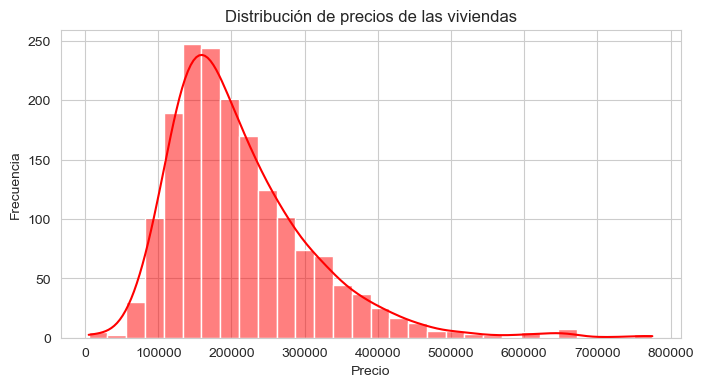

In [153]:
plt.figure(figsize=(8, 4))
sns.histplot(dataset['price'], kde=True, bins=30, color='red')
plt.title('Distribución de precios de las viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<font size="4">

#### Análisis de las variables numéricas

En este apartado procederemos a analizar las variables númericas para hacernos la idea de cómo es la distribución que siguen estos datos. Para ello, utilizaremos gráficas de densidad debido a que al ser variables numéricas, la posibilidad de valores es infinita.

Tras poder visualizar las gráficas de distribución de cada una de las variables cuantitativas, se ha decidido que las siguientes columnas van a tratarse como variables cualitativas y, por consiguiente, vamos a realizar agrupaciones de los valores de estas, debido a que los resultado están muy desequilibrados:
- bedrooms
- fireplaces

Es por ello, que vamos a convertirlas a tipo string (código debajo de las gráficas)

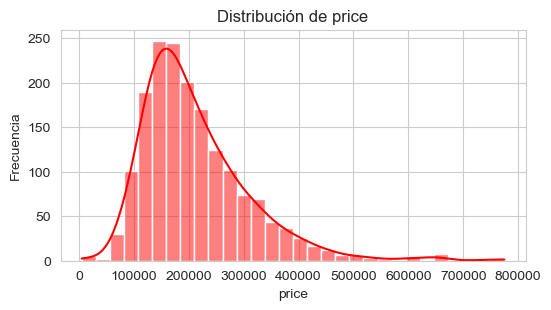

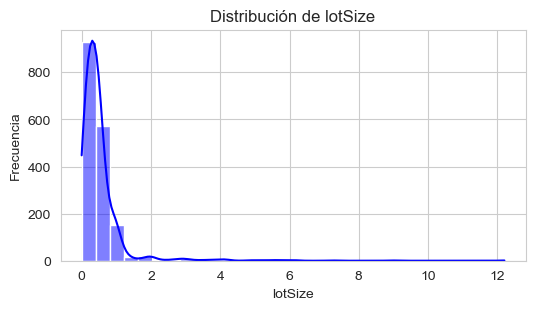

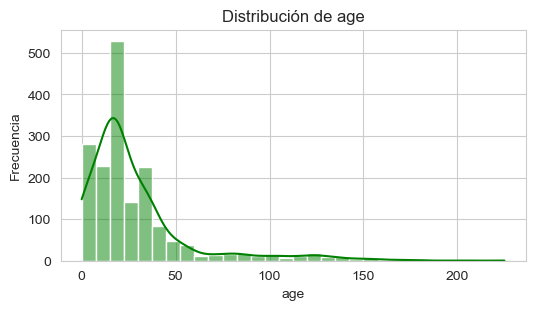

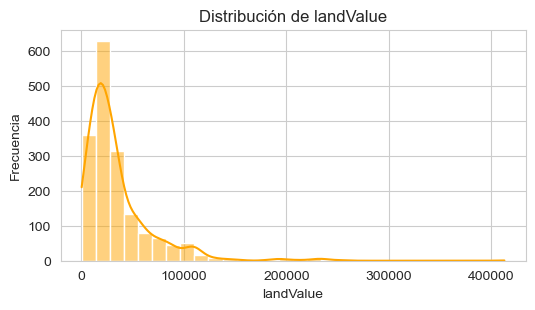

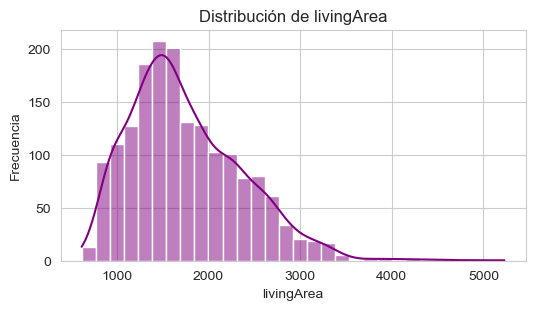

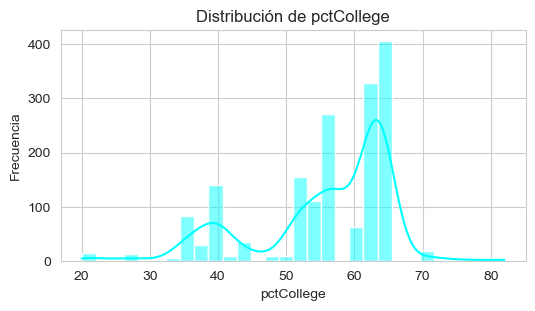

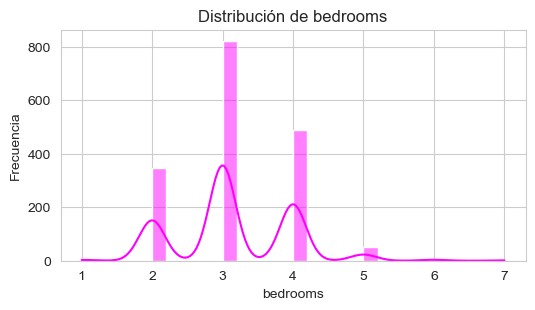

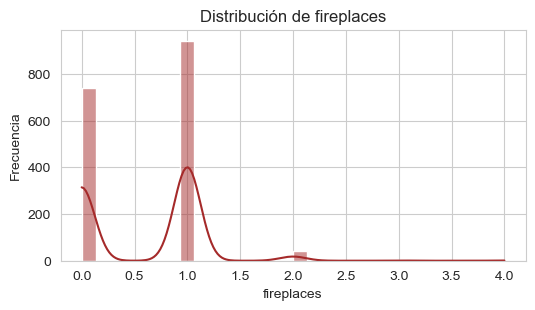

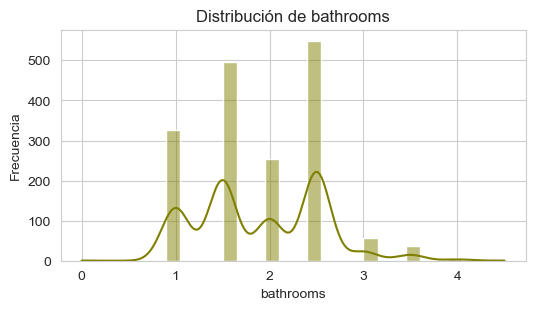

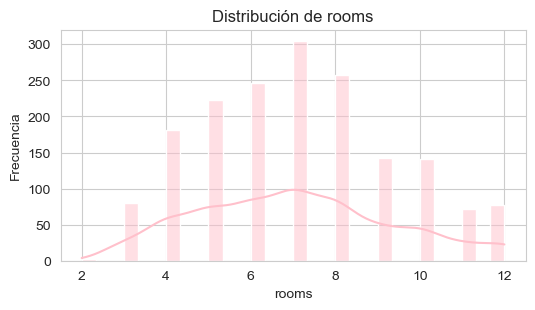

In [154]:
lista_columnas = dataset.select_dtypes(include=['int64', 'float64']).columns
colores = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'olive', 'pink']

for i, columna in enumerate(lista_columnas):
    plt.figure(figsize=(6, 3))
    color = colores[i % len(colores)]  # Para evitar errores si hay más columnas que colore
    sns.histplot(dataset[columna], kde=True, bins=30, color= color)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

In [155]:
dataset["bathrooms"]

0       1.0
1       2.5
2       1.0
3       1.5
4       1.0
       ... 
1723    2.5
1724    2.5
1725    1.0
1726    1.0
1727    1.0
Name: bathrooms, Length: 1728, dtype: float64

In [156]:
# convertimos a string las variables cuantitativas que pasamos a cualitativas
dataset.fireplaces = dataset.fireplaces.astype('str')
dataset.bedrooms = dataset.bedrooms.astype('str')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   object 
 7   fireplaces       1728 non-null   object 
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(6), object(8)
memory usage: 216.1+ KB


In [157]:
dataset.select_dtypes(include=['int64', 'float64']).describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,4.500000,12.000000


<font size="4">

Procedemos analizar la correlación de todas las variables entre si, para ello, seguiremos el esquema de esta tabla:

| Tipo de correlación                                    | Impacto en regresión lineal                           | Solución recomendada                      |
| ----------------------------------------------------- | ---------------------------------------------------- | --------------------------------------- |
| Alta correlación entre predictores (multicolinealidad) | Coeficientes inestables, dificultad de interpretación | Eliminar variables, regularización, PCA |
| Baja o nula correlación con variable objetivo          | Variable poco útil, agrega ruido                      | Eliminar variable o revisar su relevancia |
| Correlación moderada a alta con variable objetivo      | Útil para predecir                                    | Mantener en el modelo                    |

En el código de a continuación, se genera la matriz de correlación utilizando un mapa de calor. En él, podemos ver como de relacionadas están las variables entre sí. Valores cercanos a 1 y a -1 significa que esas dos variables están muy relacionadas entre sí, en cambio, valores cercanos a 0, significa que las variables no están relacionadas entre sí, lo cual puede ser positivo o no, dependiendo de si las dos variables son predictoras o, una predictora y la otra objetivo.



               price   lotSize       age  landValue  livingArea  pctCollege  \
price       1.000000  0.158333 -0.188793   0.581266    0.712390    0.200119   
lotSize     0.158333  1.000000 -0.016352   0.059222    0.163450   -0.033148   
age        -0.188793 -0.016352  1.000000  -0.021818   -0.174242   -0.037785   
landValue   0.581266  0.059222 -0.021818   1.000000    0.423441    0.228427   
livingArea  0.712390  0.163450 -0.174242   0.423441    1.000000    0.209981   
pctCollege  0.200119 -0.033148 -0.037785   0.228427    0.209981    1.000000   
bathrooms   0.597250  0.084823 -0.361897   0.297498    0.718564    0.179541   
rooms       0.531170  0.137604 -0.082264   0.298865    0.733666    0.157068   

            bathrooms     rooms  
price        0.597250  0.531170  
lotSize      0.084823  0.137604  
age         -0.361897 -0.082264  
landValue    0.297498  0.298865  
livingArea   0.718564  0.733666  
pctCollege   0.179541  0.157068  
bathrooms    1.000000  0.517585  
rooms        0.5

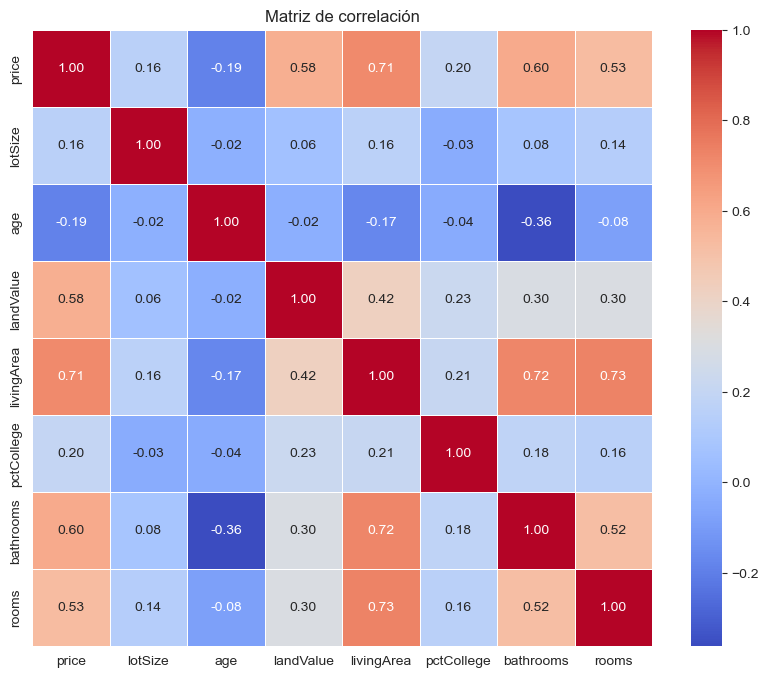

In [158]:
import matplotlib.pyplot as plt
# calculamos la matriz de correlación

dataset_num = dataset.select_dtypes(include=['int64', 'float64'])
corr_matrix = dataset_num.corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

<font size="4">

Tras analizar la correlación entre las variables. Procedemos a mantener todas las variables aunque, podríamos eliminar:
- livingArea: por su alta correlación con las variables rooms y bathrooms.
- lotSize, age y bathrooms: por su baja correlación con respecto a la variable objetivo.
<br>
<br>
<br>
#### Análisis de las variables cualitativas

Para el análisis de las variables cualitativas, vamos a proceder, primeramente a graficar cada una de ella con la finalidad de observar como se distribuyen los datos (cuanta cantidad de cada opción hay en cada variable).

Analizando las gráficas de densidad de las variables cualitativas nos damos cuenta que hay valores en ciertas variables los cuales están muy por debajo del resto de esa misma variable, es por ello que vamos a agruparlos. Las agrupaciones que vamos a realizar son las siguientes:
- bedrooms: los valores que tendrá son [1, 2, 3, 4, 5 o más]
- fireplaces: los valores que tendrá son [0, 1, 2 o más]

In [159]:
dataset.select_dtypes(include=["object"]).describe()

,bedrooms,fireplaces,heating,fuel,sewer,waterfront,newConstruction,centralAir
count,1728,1728,1728,1728,1728,1728,1728,1728
unique,7,5,3,3,3,2,2,2
top,3,1,hot air,gas,public/commercial,No,No,No
freq,822,942,1121,1197,1213,1713,1647,1093


bedrooms
1      7
2    348
3    822
4    487
5     53
6      8
7      3
Name: count, dtype: int64
******************************
fireplaces
0    740
1    942
2     42
3      2
4      2
Name: count, dtype: int64
******************************
heating
electric            305
hot air            1121
hot water/steam     302
Name: count, dtype: int64
******************************
fuel
electric     315
gas         1197
oil          216
Name: count, dtype: int64
******************************
sewer
none                   12
public/commercial    1213
septic                503
Name: count, dtype: int64
******************************
waterfront
No     1713
Yes      15
Name: count, dtype: int64
******************************
newConstruction
No     1647
Yes      81
Name: count, dtype: int64
******************************
centralAir
No     1093
Yes     635
Name: count, dtype: int64
******************************


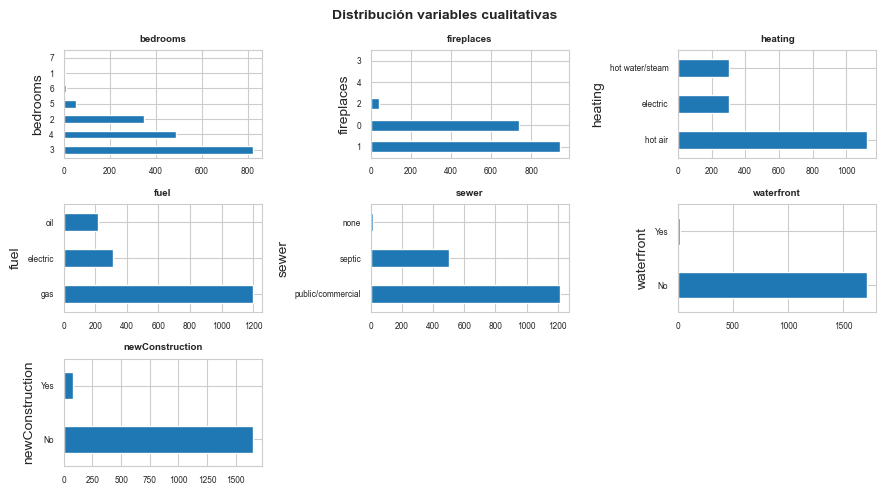

In [160]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    dataset[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold")

# calculamos densidad de valores de cada variable
for columna in dataset.select_dtypes(include=['object']).columns:
    print(f"{dataset[columna].value_counts().sort_index()}")
    print("*"*30)

<font size="4">

Procedemos a agrupar los valores que hemos mencionado anteriormente:


In [161]:
# agrupamos valores columna bedrooms
mapa_bedrooms = {
    "1" : "1",
    "2" : "2",
    "3" : "3",
    "4" : "4",
    "5" : ">5",
    "6" : ">5",
    "7" : ">5",
}

dataset['bedrooms'] = dataset['bedrooms'].map(mapa_bedrooms)
dataset['bedrooms'].unique().tolist()

['2', '3', '4', '>5', '1']

In [162]:
# agrupamos valores columna fireplace
mapa_fireplaces = {
    "0" : "0",
    "1" : "1",
    "2" : ">2",
    "3" : ">2",
    "4" : ">2"
}

dataset["fireplaces"] = dataset["fireplaces"].map(mapa_fireplaces)
dataset["fireplaces"].unique().tolist()

['1', '0', '>2']

<font size="4">

Una vez realizado todo el análisis exploratorio de los datos sobre las variables cuantitativas y cualitativas, vamos a proceder a representar como están distribuidos los datos de cada una de las variables cualitativas con respecto a la variable objetivo (precio).

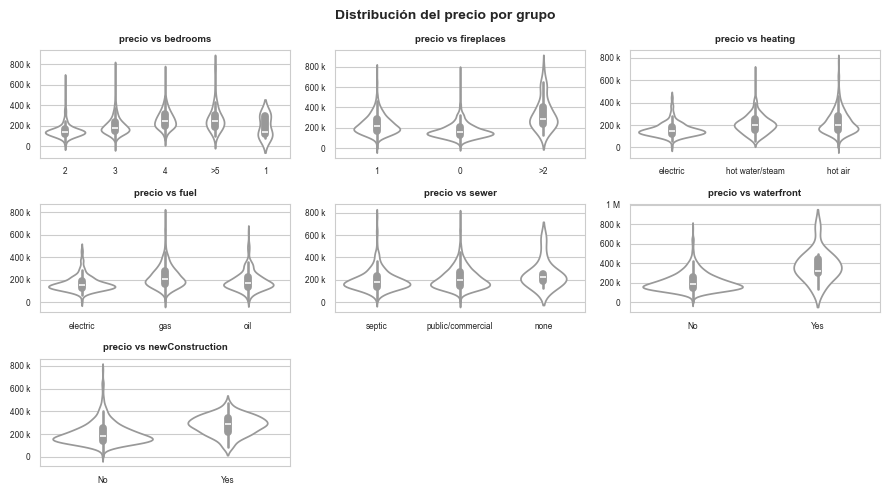

In [163]:
from matplotlib import ticker

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'price',
        data  = dataset,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

<font size="4">

# Preprocesamiento de los datos

Hasta este punto, hemos extraído gran cantidad de información del dataset y, ahora a continuación, vamos a preparar los datos para que el modelo los coja como está diseñado, es decir, vamos a realizar el preprocesamiento de los datos. 

Primero, dividiremos el dataset en conjunto train y conjunto test. Después procederemos a realizar el preprocesamiento de las variables. Para ello, aplicaremos varios métodos:
- variables cuantitativas: utilizaremos un standar_scaler para que los valores estén normalizados con media=0 y desviación=1
- variables cualitativas: dependiendo del caso, utilizaremos OneHotEncoding o LabelEncoding

Para realizar el preprocesamiento usaremos la funcion ColumnTransformer para hacer las transformaciones en paralelo

In [164]:
# Division del dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(
    dataset.drop("price", axis="columns"),
    dataset["price"],
    test_size=0.3,
    random_state=42
)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1209, 15) (1209,) (519, 15) (519,)


In [165]:
col_cualitativas = x_train.select_dtypes(include=["object"]).columns.tolist()
col_cuantitativas = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()


# Diseñamos el preprocesador
preprocesador = ColumnTransformer(
                   [('scale', StandardScaler(), col_cuantitativas),
                    ('onehot', OneHotEncoder(drop="first",handle_unknown='ignore', sparse_output=False), col_cualitativas)],
                remainder = 'passthrough',
                verbose_feature_names_out = False
               ).set_output(transform="pandas")

In [166]:
from sklearn import set_config
set_config(display='diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['lotSize', 'age', 'landValue', 'livingArea',
                                  'pctCollege', 'bathrooms', 'rooms']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['bedrooms', 'fireplaces', 'heating', 'fuel',
                                  'sewer', 'waterfront', 'newConstruction',
                                  'centralAir'])],
                  verbose_feature_names_out=False)

<font size="4">

# Creamos modelo, entrenamos y calculamos métricas

En este bloque vamos a utilizar un pipeline para realizar el preprocesamiento y el entrenamiento del modelo. Una vez hayamos realizado el entrenamiento del modelo, procederemos a calcular las métricas oportuna para evaluar el rendimiento del modelo.

El pipeline va a contener el preprocesamiento de los datos y posteriormente se le pasará al modelo. Para ello, tendremos varios modelos, en donde, cada uno de ellos, ejecutará un algoritmo diferente.

Al final de todo, se hará una comparación de los resultados de las métricas de cada uno de los modelos utilizados.

El primero de los algoritmos que vamos a utilizar es el **algoritmo de regresión lineal**, que es un modelo estadístico supervisado que busca encontrar la relación entre una o más variables independientes (predictoras) y una variable dependiente (objetivo), ajustando una recta (o un hiperplano en múltiples dimensiones) que minimiza la diferencia entre los valores predichos y los reales. Esto lo logra estimando los coeficientes de la ecuación lineal mediante el método de **mínimos cuadrados**, que minimiza la suma de los errores al cuadrado entre las predicciones del modelo y los valores observados. Es fácil de interpretar, eficiente y útil cuando la relación entre las variables es aproximadamente lineal.


In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# algoritmo de regresion lineal
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
pipeline = Pipeline(steps=[
    ("preprocessor", preprocesador),
    ("modelo", modelo)])

# entrenamos modelo
pipeline.fit(x_train, y_train)

# predicciones
predicciones = pipeline.predict(x_test)

# calculamos las metricas
r2 = r2_score(y_test, predicciones)
mae = mean_absolute_error(y_test, predicciones)
rmse = np.sqrt(mean_squared_error(y_test, predicciones))

print("\n--- Métricas sobre test ---")
print(f"R²     : {r2:.4f}")
print(f"MAE    : {mae:.2f}")
print(f"RMSE   : {rmse:.2f}")


--- Métricas sobre test ---
R²     : 0.6355
MAE    : 43941.50
RMSE   : 64195.57


<font size="4">

Como segundo algoritmo de prueba, vamos a utilizar el de **Decision Tree** (árbol de decisión), que es un modelo de aprendizaje supervisado que se utiliza tanto para clasificación como para regresión. Funciona dividiendo los datos en subconjuntos mediante decisiones secuenciales basadas en las características más relevantes del conjunto de datos. Cada nodo del árbol representa una condición sobre una variable, y las ramas indican los posibles resultados de esa condición, hasta llegar a una predicción final en las hojas. El árbol se construye eligiendo en cada paso la variable que mejor separa los datos según una métrica (como *Gini*, *entropía* o *MSE*). Su estructura lógica tipo “si... entonces...” lo hace **fácil de interpretar**, aunque es propenso al sobreajuste si no se limita su profundidad o tamaño.


In [168]:
# definimos el modelo
modelo_DT = DecisionTreeRegressor(random_state=42)

# definimos el pipeline a seguir
pipeline_DT = Pipeline(steps=[
    ("preprocesador", preprocesador),
    ("modelo", modelo_DT)
])

param_grid = {
    "modelo__max_depth": [3, 5, 10, None],
    "modelo__min_samples_split": [2, 5, 10],
    "modelo__min_samples_leaf": [1, 2, 4],
    "modelo__max_features": [None, "sqrt", "log2"]
}

gridSearchCV = GridSearchCV(
    pipeline_DT,
    param_grid,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    cv=6
) 

# entrenamos el modelo
gridSearchCV.fit(x_train, y_train)

# cogemos el mejor estimador
mejor = gridSearchCV.best_estimator_

# predecimos el modelo
y_pred_DT = mejor.predict(x_test)

# calculamos las metricas
r2 = r2_score(y_test, y_pred_DT)
mae = mean_absolute_error(y_test, y_pred_DT)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_DT))

# Impresión de resultados
print(f"R²     : {r2:.4f}")
print(f"MAE    : {mae:.2f}")
print(f"RMSE   : {rmse:.2f}")

Fitting 6 folds for each of 108 candidates, totalling 648 fits
R²     : 0.5598
MAE    : 46299.48
RMSE   : 70544.17


<font size="4">

Como último algoritmo, vamos a usar el algoritmo **K-vecinos más cercanos (KNN)**, que es un método de aprendizaje supervisado que puede usarse tanto para clasificación como para regresión. Para regresión, dado un punto nuevo, KNN busca los *k* puntos más cercanos en el espacio de características (según una métrica de distancia, típicamente Euclidiana) dentro del conjunto de entrenamiento y predice el valor para ese punto como la media (o a veces la mediana) de los valores de esos vecinos cercanos. Es un modelo simple, no paramétrico y basado en instancias, que no requiere entrenamiento explícito más allá de almacenar los datos, pero su rendimiento y precisión dependen mucho de la elección de *k* y de cómo se mida la distancia entre puntos.


In [169]:
# definimos el modelo
modelo_KN = KNeighborsRegressor(n_jobs=-1)

pipeline_KN = Pipeline(steps=[
    ("preprocessor", preprocesador),
    ("modelo", modelo_KN)
])

# creamos la instancia de validacion cruzada
resultado = cross_val_score(pipeline_KN, x_train, y_train, cv=5, scoring="r2")

# obtenemos la metrica r2
print(f"R²     : {resultado.mean()}")

R²     : 0.5919452030059096


<font size="4">

#### Conclusiones finales


- Regresión Lineal presenta el mejor desempeño general entre los tres modelos, con el mayor valor de R² (0.6355), lo que indica que explica aproximadamente el 63.5% de la variabilidad en los datos. Además, tiene los valores más bajos en MAE (43,941.50) y RMSE (64,195.57), lo que significa que sus predicciones son en promedio más cercanas a los valores reales y tienen menos errores grandes comparado con los otros modelos.
- K-Vecinos más cercanos (KNN) muestra un rendimiento intermedio, con un R² de 0.5920. Aunque es menos preciso que la regresión lineal, sigue siendo competitivo, especialmente porque KNN puede capturar relaciones no lineales que un modelo lineal no puede. Sin embargo, sus errores (MAE y RMSE) son mayores que los de regresión lineal, indicando menos precisión en promedio.
- Árbol de Decisión (DT) tiene el peor desempeño en este conjunto, con un R² de 0.5598 y errores más altos (MAE: 46,299.48, RMSE: 70,544.17). Esto puede deberse a que los árboles de decisión tienden a sobreajustar con datos pequeños o variables ruidosas, o que el modelo no fue optimizado completamente. 
